# Algoritmo de Kruskal

El algoritmo de Kruskal fue desarrollado con el objetivo de dar solución al problema del árbol recubridor mínimo

## Descripción del problema:  

El árbol recubridor mínimo consiste en un subgrafo que cumple con la estructura de un árbol, una de las características de este árbol es que conecta todos los nodos del grafo base.

De manera formal: Dado un grafo  $G(V,E)$  conexo y ponderado, siendo  V  la cantidad de nodos y  E  la cantidad de arcos, se busca un subgrafo  $\text{G′}(V,E')$  de forma que el costo de recorrer la totalidad de los nodos sea mínimo. Todo grafo  $G$  tiene un arbol recubridor mínimo $G$′, esto es fácilmente demostrable por medio de inducción matemática. Un bosque corresponde a un árbol recubridor mínimo para cada componente conexo.

## Descripción del algoritmo:

El algoritmo de Kruskal es un algoritmo greedy. Para resolver el problema, se ordenan los arcos en orden ascendente en una cola, para cada arco sacado de la cola se realiza el siguiente criterio: Si el arco conecta dos árboles diferentes, se guarda en la solución, uniendo ambos árboles. Si por el contrario el arco no conecta dos árboles distintos (es decir, forma un ciclo) este es descartado de la solución.

Una vez finalizado el algoritmo se retorna el único bosque presente, el cual corresponde al árbol recubridor mínimo del grafo.

## Ejemplo del problema: 

Suponga el siguiente grafo 

![](pics/path111.png)

Para formar el árbol se elige el primer arco en orden ascendente. En este caso el arco  $CE$. Como es el primero, es imposible que se genere un ciclo así que se añade a la solución.

![](pics/path112.png)

Se elige el siguiente arco menor, cuyo valor es de 2. De nuevo no se forman ciclos.

![](pics/path113.png)

para la siguiente iteración es posible elegir cualquiera entre aquellos arcos de valor tres, por conveniencia se eligirá el arco  $BE$ , el cual genera una conexión entre dos árboles y no crea ciclos.

![](pics/path114.png)


Ahora corresponde trabajar con el resto de arcos de valor $3$. Se selecciona aquel arco transversal  $AC$ . Note como esta conexión genera un ciclo entre los árboles presentes, por lo que no se considerará en la solución final.


![](pics/path115.png)

Se selecciona el último arco de valor 3, el cual no genera ciclos por lo que se incluye en la solución.


![](pics/path116.png)

Se continua con aquel arco  BC  de valor 4. Este arco genera un ciclo entre los nodos  BCE . Por lo que no se incluirá en la solución.


![](pics/path117.png)

Lo mismo ocurre para el arco  DC . Se genera un ciclo con la totalidad de los nodos, por lo que nuevamente no se incluye. 


Se han recorrido todos los arcos, por lo que la solución final corresponde a:


![](pics/path118.png)


El algoritmo podría haber haber terminado su ejecución satisfactoriamente en el momento que 
$V-1$ arcos forman parte de la solución, el resto de las iteraciones son con el
objetivo de clarificar el funcionamiento del algoritmo y no son necesarias en la práctica.

## Complejidad espacial

Se requiere de un espacio de $O(v)$, necesario para realizar un seguimiento de todos los vértices al principio y los subconjuntos respectivos.

Por otro lado se requiere $O(e)$, necesario para realizar un seguimiento de todos los arcos ordenados que se incluyen en ARB (árbol recubridor mínimo).

Por lo que la complejidad espacial del algoritmo es $O(v + e)$.

## Complejidad temporal



Para poder explicar el tiempo de ejecución del algoritmo de kruskal hay que explicar el tiempo de ejecución de la operación `union-find`

$O(log(E))$ al máximo para la primera iteración 

$O(log(E))$ al máximo para la segunda iteración 

Se sabe que la cantidad de arcos puede ser a lo máximo $O(V^2)$ y como mínimo $\Omega(V)$

El algoritmo de kruskal primero recorre cada nodo y crea un arbol. Esto tiene complejidad $O(V)$.

Posteriormente se ordena el arreglo de $V$ arcos, con quicksort esto tiene una complejidad $O(V \log(V))$

Luego para cada arco $E$ se aplica la operación `union-find`


**Teorema**: El algoritmo de kruskal posee un tiempo de ejecución de $\Theta(E \cdot log(V))$

Se tiene que 

$$
T(n) = O(1) + O(V) + 
O(V \log (V)) + 
O(E) \cdot O(\log (V^2))
$$

$\log(V^2) = 2 \log(V)$. Luego

$$
T(n) = O(1) + O(V) + 
O(V \log (V)) + 
2 \cdot O(E) \cdot O(\log (V))
$$

Sabiendo que $E \leq V^2$

$$
T(n) = O(E \log (V))
$$

## Correctitud del algoritmo



Primero, $T$ es un árbol recubridor. Esto es porque:


*   $T$ es un **bosque**. Nunca se crean ciclos. 
*   $T$ es **recubridor**. Supongamos que hay un vértice $v$ que no es incidente con los arcos de $T$. Entonces los arcos incidentes de $v$ tienen que haber sido considerados en el algoritmo en algún punto. El primer arco (del orden de arcos) habría sido incluído porque no puede haber creado un ciclo, lo que contradice la definición de $T$.
*   $T$ está **conectado**. Supongamos que $T$ no está conectado. Entonces $T$ tiene dos o más componentes conectados. Ya que $G$ está conectado, entonces estos componentes tienen que haber sido conectados por algunos arcos en $G$, no en $T$. El primero de estos arcos (del orden de arcos) habría sido incluído en $T$ porque no podría haber creador un ciclo, lo que contradice la definición de $T$. 

En segundo lugar, $T$ es un árbol recubridor mínimo. Vamos a comprobar esto ocupando **inducción**. Supongamos que $T$ es un árbol recubridor mínimo. Si $T = T'$, entonces $T$ es un árbol recubridor mínimo. Si $T \neq T'$, entonces existe un arco $e ∈ T'$ de *peso mínimo* que no está en $T$. Además, $T \cup e$ contiene un ciclo $C$ de modo que:


*   Cada arco en $C$ tiene un peso menor que $wt (e)$ (Esto sigue desde cómo el algoritmo construyó $T$). 
*   Hay algún arco $f$ en $C$ que no está en $T'$ (Porque $T'$ no tiene el ciclo $C$).

Considere el árbol $\{T_2 = T / {e} ∪ {f}\}$:



*   $T_2$ es un árbol recubridor.
*   $T_2$ tiene más arcos en común con $T'$ que con $T$. 
*   Y $wt(T_2)$ > $wt(T)$ (Intercambiamos un arco con otro que no sea más caro).

Podemos rehacer el mismo proceso con $T_2$ para encontrar un árbol recubridor $T_3$ con más arcos en común con $T'$. Por inducción, podemos continuar este proceso hasta que alcancemos $T'$, de lo que vemos:

$wt(T) <= wt(T_2) <= wt(T_3) <= ... <= wt(T')$.

Ya que $T'$ es un árbol recubridor mínimo, entonces estas desigualdades deben ser igualdades y concluímos que $T$ es un árbol recubridor mínimo. 


## Implementación

Se utilizan clases auxiliares `Arco` y `NodoGrafo` para poder trabajar con referencias directas a los nodos y a los arcos en vez de un arreglo.

In [101]:
import matplotlib.pyplot as plt
import networkx as nx

## Almacena ambos extremos de una conexión A -> B
# con un peso p.
class Arco:
    def __init__(self, a, b, p):
        self.a = a;
        self.b = b;
        self.peso = p
    def __repr__(self):
        return f"({self.a}, {self.b}, {self.peso})"

## Almacena el valor, el rango, referencias a sus
# arcos, tanto de llegada como de salida.
class NodoGrafo:
    def __init__(self, val):
        self.val = val

        self.rango = 0
        self.padre = self

        self.neighbors = []
        self.arcos_salida = []
        self.arcos_llegada = []
    def __repr__(self):
        return f"NodoGrafo({self.val})"


class Grafo:
    def __init__(self, length):
        self.g = nx.Graph()
        self.nodos = []
        for i in range(length):
            self.nodos.append(NodoGrafo(i));
            self.g.add_node(i)
        self.arcos = []
        self.size = length
        self.root = self.nodos[0];

    def agregar_arco(self, a_pos, b_pos, peso):
        a = Arco(self.nodos[a_pos], self.nodos[b_pos], peso)
        self.arcos.append(a);
        self.nodos[a_pos].neighbors.append(self.nodos[b_pos]);
        self.nodos[b_pos].arcos_llegada.append(a);
        self.nodos[a_pos].arcos_salida.append(a);
        self.g.add_edge(a_pos, b_pos, weight= peso)

    # Une dos conjuntos
    def union(self, a, b):
        if a.rango < b.rango:
            a.padre = b
        elif a.rango > b.rango:
            b.padre = a
        else:
            b.padre = a
            a.rango +=1

    # Utilizado para ver si dos nodos están en un mismo subconjunto
    def find(self, a):
        if a.padre != a:
            a.padre = self.find(a.padre)
        return a.padre
        
    ## Algoritmo de Kruskal
    def kruskal(self):
        ret = []
        arcos_sorted = sorted(self.arcos, key = lambda x: x.peso)
        e = 0

        i = 0
        while e < self.size - 1:
            arco = arcos_sorted[i];
            i+=1
            aa = self.find(arco.a);
            bb = self.find(arco.b);

            if aa != bb:
                e += 1;
                ret.append(arco);
                self.union(aa, bb);

        min = 0;
        added = []
        retG = nx.Graph()
        for arco in ret:
            if arco.a not in added:
                retG.add_node(arco.a.val)
                added.append(arco.a.val)
            if arco.b not in added:
                retG.add_node(arco.b.val)
                added.append(arco.b.val)
            retG.add_edge(arco.a.val, arco.b.val, weight = arco.peso)
            min += arco.peso

        fig, ax = plt.subplots()
        ax.set_facecolor('white')
        pos = nx.fruchterman_reingold_layout(retG)

        labels = nx.get_edge_attributes(retG,'weight')
        nx.draw_networkx(retG, pos)
        nx.draw_networkx_edge_labels(retG,edge_labels= labels, pos = pos)
            
        
        return min



27


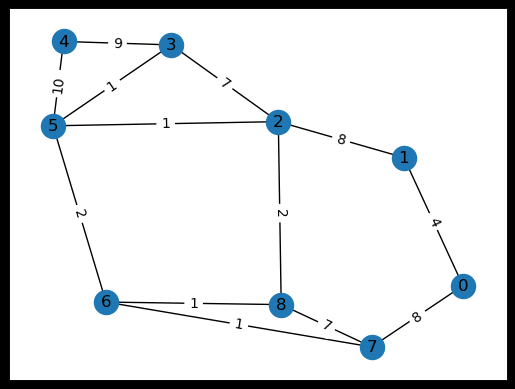

In [102]:
import random
g = Grafo(9)

map = {}
for i in range(9):
    map[str(chr(ord('a') + i))] = i



g.agregar_arco(map['a'], map['b'], 4)
g.agregar_arco(map['b'], map['c'], 8)
g.agregar_arco(map['c'], map['d'], 7)
g.agregar_arco(map['d'], map['e'], 9)
g.agregar_arco(map['e'], map['f'], 10)
g.agregar_arco(map['f'], map['g'], 2)
g.agregar_arco(map['g'], map['h'], 1)
g.agregar_arco(map['h'], map['a'], 8)

g.agregar_arco(map['h'], map['i'], 7)
g.agregar_arco(map['i'], map['c'], 2)
g.agregar_arco(map['i'], map['g'], 1)
g.agregar_arco(map['c'], map['f'], 1)
g.agregar_arco(map['d'], map['f'], 1)




print(g.kruskal());
